### Model Training, Hyperparameter Tuning and Evaluation

#### Loading the necessary libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading the dataset

In [95]:
import os
dataset_train=pd.read_csv(os.path.join('../','data','eda','dataset_train.csv'))
dataset_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [96]:
dept_store_sorted_df=dataset_train.sort_values(by=['Dept','Store','Date']).reset_index(drop=True)
dept_store_sorted_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [97]:
full_df=pd.read_csv(os.path.join('../','data','eda','full_df.csv'))
full_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


#### We can furthur feature engineer this complete dataset. For example: We can add a holiday proximity feature which shows the value indicating how far is the next holiday. This can help the model for identify the spikes in the weekly sales over the years more effectively

In [98]:
full_df['Date'] = pd.to_datetime(full_df['Date'])
holiday_dates = full_df.loc[full_df['IsHoliday'] == True, 'Date'].unique()

full_df['Weeks_To_Holiday'] = full_df['Date'].apply(
    lambda x: min(abs((x - pd.to_datetime(holiday_dates)).days) // 7)
)

KeyboardInterrupt: 

In [ ]:
full_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Weeks_To_Holiday
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,1
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,0
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,1
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,3


#### Lets plot to confirm whether Weeks_To_Holiday feature column is created properly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset
df = pd.DataFrame({
    'Date': pd.date_range(start='2010-01-01', periods=52, freq='W'),
    'WeeksFromSchoolBreak': range(-26, 26),  # just a placeholder
    'IsHoliday': [False]*52
})

# Mark a few holidays for demo
df.loc[[5, 20, 35, 50], 'IsHoliday'] = True

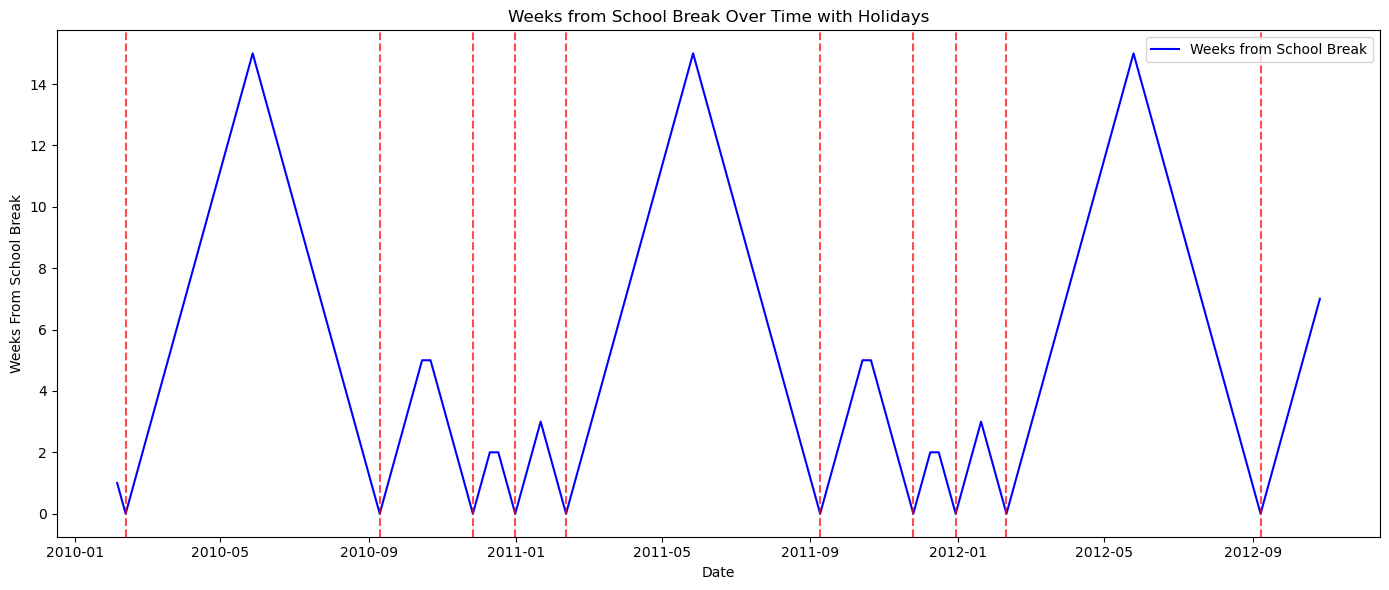

In [ ]:
subset_df=full_df[(full_df['Dept']==1)&(full_df['Store']==1)].sort_values(by=['Date']).reset_index(drop=True)
plt.figure(figsize=(14, 6))

# Line plot of WeeksFromSchoolBreak
plt.plot(subset_df['Date'], subset_df['Weeks_To_Holiday'], label='Weeks from School Break', color='blue')

# Add vertical dashed lines for holidays
for holiday_date in subset_df.loc[subset_df['IsHoliday'], 'Date']:
    plt.axvline(x=holiday_date, color='red', linestyle='--', alpha=0.7)

# Labels, title, legend
plt.xlabel('Date')
plt.ylabel('Weeks From School Break')
plt.title('Weeks from School Break Over Time with Holidays')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

full_df['Date'] = pd.to_datetime(full_df['Date'])

In [ ]:
# Example for one store-department pair
store_id, dept_id = 1, 1
ts = full_df[(full_df['Store']==store_id) & (full_df['Dept']==dept_id)]
ts.set_index('Date', inplace=True)

# Split last 12 weeks for test
train_size = len(ts) - 12
train, test = ts['Weekly_Sales'][:train_size], ts['Weekly_Sales'][train_size:]

In [ ]:
naive_forecast = train.iloc[-1]
naive_forecast_series = pd.Series([naive_forecast]*len(test), index=test.index)

In [ ]:
s = 52  # weekly seasonality
seasonal_naive_forecast = train.shift(s).iloc[-12:]
seasonal_naive_forecast.index = test.index

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(train).fit()
ses_forecast = ses_model.forecast(len(test))

c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(train, seasonal='add', trend='add', seasonal_periods=52).fit()
hw_forecast = hw_model.forecast(len(test))

c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Hyperparameter tuning (example small grid)
p = d = q = range(0,2)
import itertools
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in pdq]

best_aic = np.inf
best_params = None

for param in pdq:
    for seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train, order=param, seasonal_order=seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, seasonal)
        except:
            continue

# Train final SARIMA
sarima_model = SARIMAX(train, order=best_params[0], seasonal_order=best_params[1], enforce_stationarity=False, enforce_invertibility=False).fit()
sarima_forecast = sarima_model.forecast(len(test))

c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packa

In [ ]:
import numpy as np

def weighted_mae(y_true, y_pred, weights=None):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    if weights is None:
        weights = np.ones_like(y_true)
    else:
        weights = np.array(weights)
    
    wmae = np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)
    return wmae

models = {
    'Naive': naive_forecast_series,
    'Seasonal Naive': seasonal_naive_forecast,
    'SES': ses_forecast,
    'Holt-Winters': hw_forecast,
    'SARIMA': sarima_forecast
}

weights = np.where(ts[train_size:]['IsHoliday'], 5, 1)

for name, pred in models.items():
    wmae=weighted_mae(test,pred,weights)
    print(f"{name}-> WMAE: {wmae}")


Naive-> WMAE: 2983.552499999999
Seasonal Naive-> WMAE: 4028.975625
SES-> WMAE: 2983.714188334452
Holt-Winters-> WMAE: 1607.6788257165135
SARIMA-> WMAE: 853.6168700502852


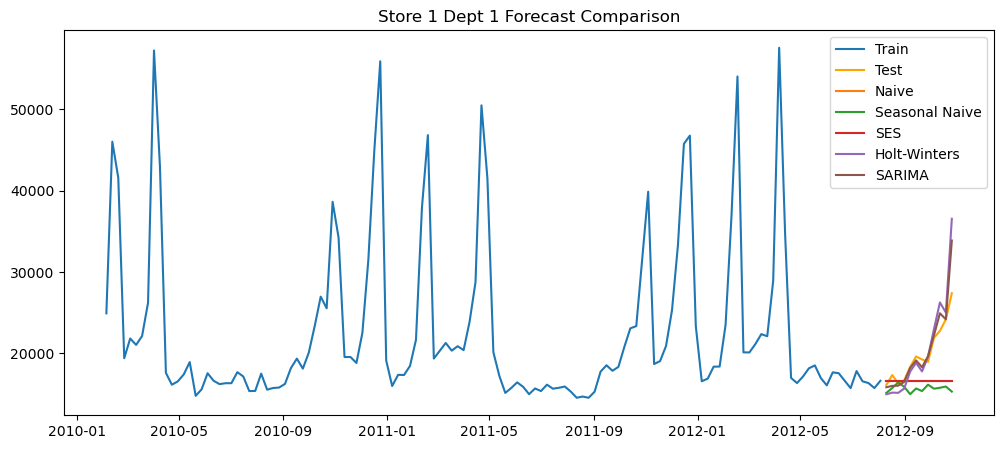

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')

for name, pred in models.items():
    plt.plot(pred.index, pred, label=name)

plt.title(f'Store {store_id} Dept {dept_id} Forecast Comparison')
plt.legend()
plt.show()

#### Lets experiment with some ensemble models like random forest regressor because even though some departments in some store have seasonal spikes in the weekly sales, SARIMAX model ASSUMES that there are going to be seasonality in whichever trend it is being ran on which is not true for all the departments across the stores. Hence for dealing with weekly sales forecast in general, we need to deal with non linear relationship to have higher prediction accuracy

In [ ]:
full_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Weeks_To_Holiday
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,1
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,0
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,1
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,3


In [ ]:
full_df.dtypes

Store                        int64
Dept                         int64
Date                datetime64[ns]
Weekly_Sales               float64
IsHoliday                     bool
Temperature                float64
Fuel_Price                 float64
CPI                        float64
Unemployment               float64
Type                        object
Size                         int64
Weeks_To_Holiday             int64
dtype: object

In [ ]:
full_df['IsHoliday']=full_df['IsHoliday'].astype(int)

In [ ]:

rfr_full_df = pd.get_dummies(
    full_df,
    columns=['Type'],
    drop_first=True  # avoid dummy trap if needed
)

rfr_full_df["Year"] = rfr_full_df["Date"].dt.year
rfr_full_df["Month"] = rfr_full_df["Date"].dt.month
rfr_full_df["Week"] = rfr_full_df["Date"].dt.isocalendar().week

lags = [1,2,3,4,12,52]

for lag in lags:
    rfr_full_df[f"lag_{lag}"] = rfr_full_df.groupby(["Store","Dept"])["Weekly_Sales"].shift(lag)

rfr_full_df["rolling_4w"] = rfr_full_df.groupby(["Store","Dept"])["Weekly_Sales"].shift(1).rolling(4).mean()


In [ ]:
rfr_full_df.shape

(521235, 23)

In [ ]:
rfr_full_df.isna().sum()

Store                    0
Dept                     0
Date                     0
Weekly_Sales             0
IsHoliday                0
Temperature              0
Fuel_Price               0
CPI                      0
Unemployment             0
Size                     0
Weeks_To_Holiday         0
Type_B                   0
Type_C                   0
Year                     0
Month                    0
Week                     0
lag_1                 3645
lag_2                 7290
lag_3                10935
lag_4                14580
lag_12               43740
lag_52              189540
rolling_4w           14580
dtype: int64

In [ ]:
pd.set_option("display.max_columns",None)
rfr_full_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Weeks_To_Holiday,Type_B,Type_C,Year,Month,Week,lag_1,lag_2,lag_3,lag_4,lag_12,lag_52,rolling_4w
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,151315,1,False,False,2010,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,151315,0,False,False,2010,2,6,24924.50,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,151315,1,False,False,2010,2,7,46039.49,24924.50,NaN,NaN,NaN,NaN,NaN
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,151315,2,False,False,2010,2,8,41595.55,46039.49,24924.50,NaN,NaN,NaN,NaN
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,151315,3,False,False,2010,3,9,19403.54,41595.55,46039.49,24924.5,NaN,NaN,32990.77


In [ ]:
def weighted_mae(y_true, y_pred, weights):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    weights = np.array(weights)
    return np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

y = rfr_full_df["Weekly_Sales"]
X = rfr_full_df.drop(columns=["Weekly_Sales", "Date"], errors="ignore")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_dist = {
    "n_estimators": [200],
    "max_depth": [15],
    "min_samples_split": [5],
    "min_samples_leaf": [4],
    "max_features": ["sqrt"]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

weights = np.where(X_test['IsHoliday']==1, 5, 1)
wmae = weighted_mae(y_test, y_pred, weights)

print("Random Forest Performance (after hyperparameter tuning):")
print(f"MAE  : {mae:.2f}")
print(f"Weighted MAE: {wmae:.2f}")
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop Important Features:")
print(importances.head(20))

c:\Users\aadit\Anaconda\envs\store-sales-forecast\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Random Forest Performance (after hyperparameter tuning):
MAE  : 1102.48
Weighted MAE: 1247.84

Top Important Features:
lag_1               0.272310
rolling_4w          0.179900
lag_2               0.154169
lag_3               0.132295
lag_4               0.099853
lag_12              0.066950
lag_52              0.060741
Dept                0.011575
Week                0.005274
Size                0.004661
Month               0.002150
Weeks_To_Holiday    0.001610
Fuel_Price          0.001240
Temperature         0.001227
Store               0.001129
Unemployment        0.001064
Type_B              0.001062
CPI                 0.001044
IsHoliday           0.000952
Year                0.000687
dtype: float64


In [ ]:
best_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

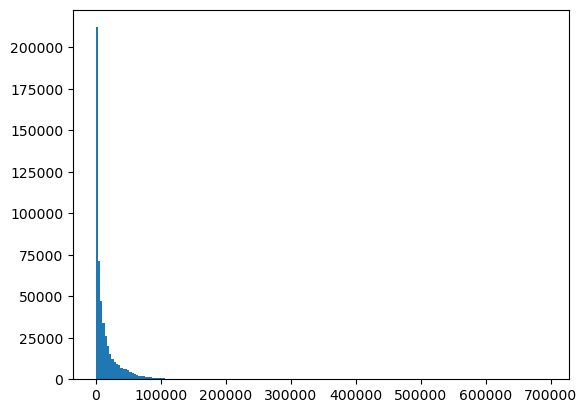

In [ ]:
plt.hist(full_df['Weekly_Sales'],bins=200)
plt.show()

#### Now time to submit to the kaggle competition

In [ ]:
test_df=pd.read_csv(os.path.join('../','data','raw','test.csv'))
test_df=test_df.sort_values(by=["Store","Dept","Date"]).reset_index(drop=True)
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
feature_store_df=pd.read_csv(os.path.join('../','data','eda','feature_store_df.csv'))
feature_store_df.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,A,151315


In [ ]:
test_df.shape

(115064, 4)

In [ ]:
test_df['IsHoliday']=np.where(test_df['IsHoliday']==True,1,0)
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,0
1,1,1,2012-11-09,0
2,1,1,2012-11-16,0
3,1,1,2012-11-23,1
4,1,1,2012-11-30,0


In [ ]:
full_test_df=pd.merge(test_df,feature_store_df,how='left',on=['Store','Date','IsHoliday'])
full_test_df=full_test_df.sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
full_test_df.shape

(115064, 10)

In [ ]:
full_test_df.isna().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [ ]:
rfr_full_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Weeks_To_Holiday,Type_B,Type_C,Year,Month,Week,lag_1,lag_2,lag_3,lag_4,lag_12,lag_52,rolling_4w
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,151315,1,False,False,2010,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,151315,0,False,False,2010,2,6,24924.50,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,151315,1,False,False,2010,2,7,46039.49,24924.50,NaN,NaN,NaN,NaN,NaN
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,151315,2,False,False,2010,2,8,41595.55,46039.49,24924.50,NaN,NaN,NaN,NaN
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,151315,3,False,False,2010,3,9,19403.54,41595.55,46039.49,24924.5,NaN,NaN,32990.77


In [ ]:
full_test_df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,0,55.32,3.386,223.462779,6.573,A,151315
1,1,1,2012-11-09,0,61.24,3.314,223.481307,6.573,A,151315
2,1,1,2012-11-16,0,52.92,3.252,223.512911,6.573,A,151315
3,1,1,2012-11-23,1,56.23,3.211,223.561947,6.573,A,151315
4,1,1,2012-11-30,0,52.34,3.207,223.610984,6.573,A,151315


In [ ]:
full_test_df['Date'] = pd.to_datetime(full_test_df['Date'])
holiday_dates = full_test_df.loc[full_test_df['IsHoliday'] == True, 'Date'].unique()

full_test_df['Weeks_To_Holiday'] = full_test_df['Date'].apply(
    lambda x: min(abs((x - pd.to_datetime(holiday_dates)).days) // 7)
)

In [ ]:
full_test_df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Weeks_To_Holiday
0,1,1,2012-11-02,0,55.32,3.386,223.462779,6.573,A,151315,3
1,1,1,2012-11-09,0,61.24,3.314,223.481307,6.573,A,151315,2
2,1,1,2012-11-16,0,52.92,3.252,223.512911,6.573,A,151315,1
3,1,1,2012-11-23,1,56.23,3.211,223.561947,6.573,A,151315,0
4,1,1,2012-11-30,0,52.34,3.207,223.610984,6.573,A,151315,1


In [ ]:
full_test_df.dtypes

Store                        int64
Dept                         int64
Date                datetime64[ns]
IsHoliday                   object
Temperature                float64
Fuel_Price                 float64
CPI                        float64
Unemployment               float64
Type                        object
Size                         int64
Weeks_To_Holiday             int64
dtype: object

In [ ]:
full_test_df = pd.get_dummies(
    full_test_df,
    columns=['Type'],
    drop_first=True  # avoid dummy trap if needed
)

full_test_df["Year"] = full_test_df["Date"].dt.year
full_test_df["Month"] = full_test_df["Date"].dt.month
full_test_df["Week"] = full_test_df["Date"].dt.isocalendar().week

In [ ]:
full_test_df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Weeks_To_Holiday,Type_B,Type_C,Year,Month,Week
0,1,1,2012-11-02,0,55.32,3.386,223.462779,6.573,151315,3,False,False,2012,11,44
1,1,1,2012-11-09,0,61.24,3.314,223.481307,6.573,151315,2,False,False,2012,11,45
2,1,1,2012-11-16,0,52.92,3.252,223.512911,6.573,151315,1,False,False,2012,11,46
3,1,1,2012-11-23,1,56.23,3.211,223.561947,6.573,151315,0,False,False,2012,11,47
4,1,1,2012-11-30,0,52.34,3.207,223.610984,6.573,151315,1,False,False,2012,11,48


In [ ]:
# Mark which rows are train vs test
rfr_full_df['is_train'] = 1
full_test_df['is_train'] = 0

# Ensure test_df has Weekly_Sales column (can be NaN)
full_test_df['Weekly_Sales'] = np.nan

# Concatenate along rows
full_df_combined = pd.concat([rfr_full_df, full_test_df], ignore_index=True)

full_df_combined=full_df_combined.sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [ ]:
lags = [1,2,3,4,12,52]

full_df_combined=full_df_combined.sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

for lag in lags:
    full_df_combined[f'lag_{lag}'] = (
        full_df_combined
        .groupby(['Store','Dept'])['Weekly_Sales']
        .shift(lag)
    )

# Optional: rolling mean
full_df_combined['rolling_4w'] = (
    full_df_combined
    .groupby(['Store','Dept'])['Weekly_Sales']
    .shift(1)
    .rolling(4)
    .mean()
)

In [ ]:
full_df_combined.shape

(636299, 24)

In [ ]:
full_df_combined.isna().sum()

Store                    0
Dept                     0
Date                     0
Weekly_Sales        115064
IsHoliday                0
Temperature              0
Fuel_Price               0
CPI                      0
Unemployment             0
Size                     0
Weeks_To_Holiday         0
Type_B                   0
Type_C                   0
Year                     0
Month                    0
Week                     0
lag_1               115540
lag_2               116050
lag_3               116589
lag_4               117149
lag_12              122092
lag_52              189540
rolling_4w          126475
is_train                 0
dtype: int64

In [ ]:
full_test_df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Weeks_To_Holiday,Type_B,Type_C,Year,Month,Week,is_train,Weekly_Sales
0,1,1,2012-11-02,0,55.32,3.386,223.462779,6.573,151315,3,False,False,2012,11,44,0,NaN
1,1,1,2012-11-09,0,61.24,3.314,223.481307,6.573,151315,2,False,False,2012,11,45,0,NaN
2,1,1,2012-11-16,0,52.92,3.252,223.512911,6.573,151315,1,False,False,2012,11,46,0,NaN
3,1,1,2012-11-23,1,56.23,3.211,223.561947,6.573,151315,0,False,False,2012,11,47,0,NaN
4,1,1,2012-11-30,0,52.34,3.207,223.610984,6.573,151315,1,False,False,2012,11,48,0,NaN


In [ ]:
# Separate train and test
train_df = full_df_combined[full_df_combined["is_train"] == 1].copy()
test_df  = full_df_combined[full_df_combined["is_train"] == 0].copy()

# Null counts
print("Train Null Counts:")
print(train_df.isna().sum()[lambda x: x > 0])

print("\nTest Null Counts:")
print(test_df.isna().sum()[lambda x: x > 0])

# Optional: percentages
print("\nTrain Null %:")
print((train_df.isna().mean() * 100).round(2)[lambda x: x > 0])

print("\nTest Null %:")
print((test_df.isna().mean() * 100).round(2)[lambda x: x > 0])

Train Null Counts:
lag_1           3645
lag_2           7290
lag_3          10935
lag_4          14580
lag_12         43740
lag_52        189540
rolling_4w     14580
dtype: int64

Test Null Counts:
Weekly_Sales    115064
lag_1           111895
lag_2           108760
lag_3           105654
lag_4           102569
lag_12           78352
rolling_4w      111895
dtype: int64

Train Null %:
lag_1          0.70
lag_2          1.40
lag_3          2.10
lag_4          2.80
lag_12         8.39
lag_52        36.36
rolling_4w     2.80
dtype: float64

Test Null %:
Weekly_Sales    100.00
lag_1            97.25
lag_2            94.52
lag_3            91.82
lag_4            89.14
lag_12           68.09
rolling_4w       97.25
dtype: float64


In [ ]:
full_df_combined.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Weeks_To_Holiday,Type_B,Type_C,Year,Month,Week,lag_1,lag_2,lag_3,lag_4,lag_12,lag_52,rolling_4w,is_train
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,151315,1,False,False,2010,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,151315,0,False,False,2010,2,6,24924.50,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,151315,1,False,False,2010,2,7,46039.49,24924.50,NaN,NaN,NaN,NaN,NaN,1
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,151315,2,False,False,2010,2,8,41595.55,46039.49,24924.50,NaN,NaN,NaN,NaN,1
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,151315,3,False,False,2010,3,9,19403.54,41595.55,46039.49,24924.5,NaN,NaN,32990.77,1


In [ ]:
full_test_df=full_df_combined[full_df_combined['is_train']==0]
full_test_df=full_test_df.sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
full_test_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Weeks_To_Holiday,Type_B,Type_C,Year,Month,Week,lag_1,lag_2,lag_3,lag_4,lag_12,lag_52,rolling_4w,is_train
0,1,1,2012-11-02,NaN,0,55.32,3.386,223.462779,6.573,151315,3,False,False,2012,11,44,27390.81,24185.27,22764.01,21904.47,16119.92,39886.06,24061.14,0
1,1,1,2012-11-09,NaN,0,61.24,3.314,223.481307,6.573,151315,2,False,False,2012,11,45,NaN,27390.81,24185.27,22764.01,17330.70,18689.54,NaN,0
2,1,1,2012-11-16,NaN,0,52.92,3.252,223.512911,6.573,151315,1,False,False,2012,11,46,NaN,NaN,27390.81,24185.27,16286.40,19050.66,NaN,0
3,1,1,2012-11-23,NaN,1,56.23,3.211,223.561947,6.573,151315,0,False,False,2012,11,47,NaN,NaN,NaN,27390.81,16680.24,20911.25,NaN,0
4,1,1,2012-11-30,NaN,0,52.34,3.207,223.610984,6.573,151315,1,False,False,2012,11,48,NaN,NaN,NaN,NaN,18322.37,25293.49,NaN,0


In [ ]:
full_test_df=full_test_df.drop(columns=['Weekly_Sales','is_train'])
full_test_df.shape

(115064, 22)

In [ ]:
full_test_df.isna().sum()

Store                    0
Dept                     0
Date                     0
IsHoliday                0
Temperature              0
Fuel_Price               0
CPI                      0
Unemployment             0
Size                     0
Weeks_To_Holiday         0
Type_B                   0
Type_C                   0
Year                     0
Month                    0
Week                     0
lag_1               111895
lag_2               108760
lag_3               105654
lag_4               102569
lag_12               78352
lag_52                   0
rolling_4w          111895
dtype: int64

In [ ]:
full_test_df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Weeks_To_Holiday,Type_B,Type_C,Year,Month,Week,lag_1,lag_2,lag_3,lag_4,lag_12,lag_52,rolling_4w
0,1,1,2012-11-02,0,55.32,3.386,223.462779,6.573,151315,3,False,False,2012,11,44,27390.81,24185.27,22764.01,21904.47,16119.92,39886.06,24061.14
1,1,1,2012-11-09,0,61.24,3.314,223.481307,6.573,151315,2,False,False,2012,11,45,NaN,27390.81,24185.27,22764.01,17330.70,18689.54,NaN
2,1,1,2012-11-16,0,52.92,3.252,223.512911,6.573,151315,1,False,False,2012,11,46,NaN,NaN,27390.81,24185.27,16286.40,19050.66,NaN
3,1,1,2012-11-23,1,56.23,3.211,223.561947,6.573,151315,0,False,False,2012,11,47,NaN,NaN,NaN,27390.81,16680.24,20911.25,NaN
4,1,1,2012-11-30,0,52.34,3.207,223.610984,6.573,151315,1,False,False,2012,11,48,NaN,NaN,NaN,NaN,18322.37,25293.49,NaN


In [ ]:
import numpy as np
import pandas as pd

# Assume:
# rfr = trained RandomForestRegressor
# full_df_combined has train and test together, with 'is_train' column
# lags = [1,2,3,4,12,52]

features = [col for col in full_df_combined.columns if col not in ["Weekly_Sales", "Date", "is_train"]]

# Separate test set
test_forecast = full_test_df.copy()
test_forecast = test_forecast.sort_values(by=["Store", "Dept", "Date"]).reset_index(drop=True)

# Store predictions
preds = []

# Group by Store and Dept to avoid mixing lags across series
for (store, dept), group in test_forecast.groupby(["Store", "Dept"]):
    group_idx = group.index.tolist()  # indexes in test_forecast
    # Iterate row by row within this group
    for i, idx in enumerate(group_idx):
        row = test_forecast.loc[idx].copy()

        # Predict using the row (keep as DataFrame to avoid feature-name warning)
        X = row[features].to_frame().T
        y_hat = best_rf.predict(X)[0]

        preds.append((idx, y_hat))

        # Update lag features for next row in the group
        if i + 1 < len(group_idx):
            next_idx = group_idx[i + 1]
            test_forecast.loc[next_idx, "lag_1"] = y_hat
            for lag in [2, 3, 4, 12, 52]:
                col_current = f"lag_{lag}"
                col_prev = f"lag_{lag-1}"
                if col_current in test_forecast.columns:
                    test_forecast.loc[next_idx, col_current] = row.get(col_prev, np.nan)

            # Update rolling_4w
            last4 = [
                test_forecast.loc[next_idx, f"lag_{k}"]
                for k in range(1, 5)
                if f"lag_{k}" in test_forecast.columns
            ]
            if len(last4) == 4:
                test_forecast.loc[next_idx, "rolling_4w"] = np.mean(last4)

# Assign predictions back to test DataFrame
preds_sorted = sorted(preds, key=lambda x: x[0])  # ensure order matches test_forecast
test_forecast["Weekly_Sales_Pred"] = [y_hat for _, y_hat in preds_sorted]


KeyboardInterrupt: 

In [ ]:
test_forecast.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Weeks_To_Holiday,Type_B,Type_C,Year,Month,Week,lag_1,lag_2,lag_3,lag_4,lag_12,lag_52,rolling_4w,Weekly_Sales_Pred
0,1,1,2012-11-02,0,55.32,3.386,223.462779,6.573,151315,3,False,False,2012,11,44,27390.810000,24185.270000,22764.010000,21904.470000,16119.92,39886.06,24061.140000,35395.254977
1,1,1,2012-11-09,0,61.24,3.314,223.481307,6.573,151315,2,False,False,2012,11,45,35395.254977,27390.810000,24185.270000,22764.010000,NaN,NaN,27433.836244,33633.816687
2,1,1,2012-11-16,0,52.92,3.252,223.512911,6.573,151315,1,False,False,2012,11,46,33633.816687,35395.254977,27390.810000,24185.270000,NaN,NaN,30151.287916,33437.691320
3,1,1,2012-11-23,1,56.23,3.211,223.561947,6.573,151315,0,False,False,2012,11,47,33437.691320,33633.816687,35395.254977,27390.810000,NaN,NaN,32464.393246,39252.348789
4,1,1,2012-11-30,0,52.34,3.207,223.610984,6.573,151315,1,False,False,2012,11,48,39252.348789,33437.691320,33633.816687,35395.254977,NaN,NaN,35429.777943,41649.089462


In [ ]:
import pandas as pd

test_forecast['Id'] = test_forecast['Store'].astype(str) + '_' + test_forecast['Dept'].astype(str) + '_' + test_forecast['Date'].astype(str)

submission_df = pd.DataFrame({
    'Id': test_forecast['Id'],
    'Weekly_Sales': test_forecast['Weekly_Sales_Pred']
})

print(submission_df.head())

model_training_dir=os.path.join('../','data','model_training')
os.makedirs(model_training_dir,exist_ok=True)
submission_df.to_csv(os.path.join(model_training_dir,'submission.csv'), index=False)

               Id  Weekly_Sales
0  1_1_2012-11-02  35395.254977
1  1_1_2012-11-09  33633.816687
2  1_1_2012-11-16  33437.691320
3  1_1_2012-11-23  39252.348789
4  1_1_2012-11-30  41649.089462


In [ ]:
submission_df.shape

(115064, 2)

#### Now let start analysing for Business Decisions.

#### First we observed earlier that some of the departments had weekly sales spikes for holiday weeks and some of them did not have that. So first step is to bifurgate such departments based on the weekly sales and the way to do that is to do clustering based on the weekly sales around the holiday week for all the departments

In [52]:
import pandas as pd
import os
import numpy as np

train_df=pd.read_csv(os.path.join('../','data','raw','train.csv'))
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [53]:
train_df=train_df.sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [54]:
train_df['IsHoliday']=np.where(train_df['IsHoliday']==True,1,0)
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,0
1,1,1,2010-02-12,46039.49,1
2,1,1,2010-02-19,41595.55,0
3,1,1,2010-02-26,19403.54,0
4,1,1,2010-03-05,21827.90,0


In [55]:
train_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday         int64
dtype: object

In [56]:
train_df['Date']=pd.to_datetime(train_df['Date'])
train_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int64
dtype: object

In [57]:
train_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [58]:
holiday_dates = train_df.loc[train_df['IsHoliday'] == True, 'Date'].unique()

train_df['Weeks_To_Holiday'] = train_df['Date'].apply(
    lambda x: min(abs((x - pd.to_datetime(holiday_dates)).days) // 7)
)

In [59]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Weeks_To_Holiday
0,1,1,2010-02-05,24924.50,0,1
1,1,1,2010-02-12,46039.49,1,0
2,1,1,2010-02-19,41595.55,0,1
3,1,1,2010-02-26,19403.54,0,2
4,1,1,2010-03-05,21827.90,0,3


In [60]:
train_df.describe()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Weeks_To_Holiday
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,0.070358,5.541433
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,0.000000,0.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,0.000000,2.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,0.000000,4.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,0.000000,9.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,1.000000,15.000000
std,12.785297,30.492054,NaN,22711.183519,0.255750,4.403607


In [61]:
subset_df=train_df[train_df['Weeks_To_Holiday']<5]
subset_df.shape

(215675, 6)

In [62]:
max_min_sales_df = subset_df.groupby(['Store', 'Dept']).agg(
    Max_Weekly_Sales=('Weekly_Sales', 'max'),
    Min_Weekly_Sales=('Weekly_Sales', 'min')
).reset_index()

print(max_min_sales_df)


      Store  Dept  Max_Weekly_Sales  Min_Weekly_Sales
0         1     1          55931.23          14537.37
1         1     2          65615.36          35819.83
2         1     3          51159.17           8097.92
3         1     4          47893.23          32497.43
4         1     5          85676.09          13570.32
...     ...   ...               ...               ...
3307     45    94           7148.87              2.94
3308     45    95          75204.77          41131.42
3309     45    96              2.94              2.94
3310     45    97           8765.09           5011.36
3311     45    98           1218.64              2.00

[3312 rows x 4 columns]


In [63]:
max_min_sales_df.shape

(3312, 4)

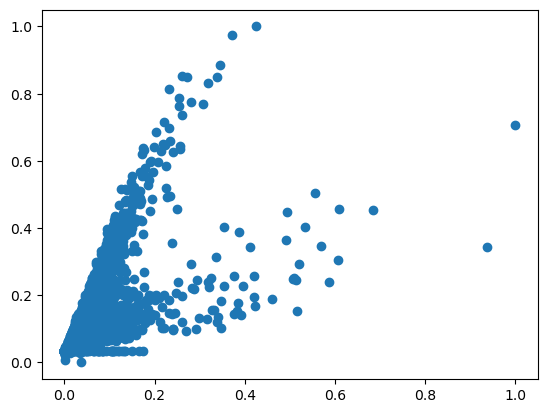

In [64]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

max_min_sales_df['Sales_Diff'] = max_min_sales_df['Max_Weekly_Sales'] - max_min_sales_df['Min_Weekly_Sales']

features = ['Max_Weekly_Sales', 'Min_Weekly_Sales', 'Sales_Diff']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(max_min_sales_df[features])
max_min_sales_df[features] = X_scaled

plt.scatter(max_min_sales_df['Max_Weekly_Sales'],max_min_sales_df['Min_Weekly_Sales'])
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Select numeric columns for clustering
X = max_min_sales_df[['Max_Weekly_Sales', 'Min_Weekly_Sales','Sales_Diff']]

# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
max_min_sales_df['Cluster'] = hc.fit_predict(X_scaled)

# View resulting DataFrame
print(max_min_sales_df)

      Store  Dept  Max_Weekly_Sales  Min_Weekly_Sales  Sales_Diff  Cluster
0         1     1          0.080777          0.135998    0.068360        2
1         1     2          0.094748          0.284227    0.049206        2
2         1     3          0.073892          0.091148    0.071114        2
3         1     4          0.069181          0.261087    0.025425        2
4         1     5          0.123689          0.129263    0.119079        2
...     ...   ...               ...               ...         ...      ...
3307     45    94          0.010400          0.034768    0.011801        1
3308     45    95          0.108582          0.321222    0.056271        2
3309     45    96          0.000091          0.034768    0.000000        1
3310     45    97          0.012732          0.069651    0.006199        1
3311     45    98          0.001845          0.034761    0.002009        1

[3312 rows x 6 columns]


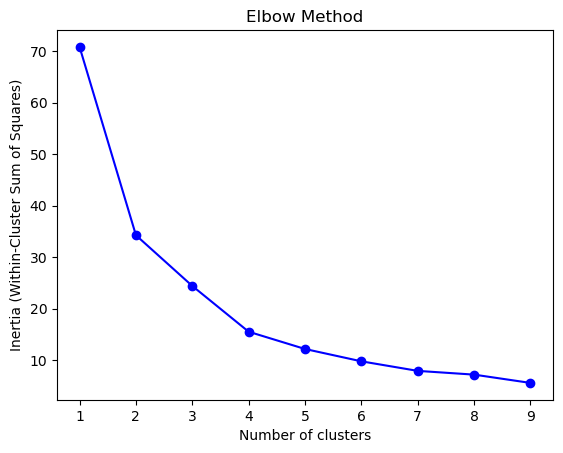

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = max_min_sales_df[['Max_Weekly_Sales', 'Min_Weekly_Sales', 'Sales_Diff']]

inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()


Clusters: 2, Silhouette Score: 0.727
Clusters: 3, Silhouette Score: 0.677
Clusters: 4, Silhouette Score: 0.636
Clusters: 5, Silhouette Score: 0.608
Clusters: 6, Silhouette Score: 0.591
Clusters: 7, Silhouette Score: 0.573
Clusters: 8, Silhouette Score: 0.555
Clusters: 9, Silhouette Score: 0.558


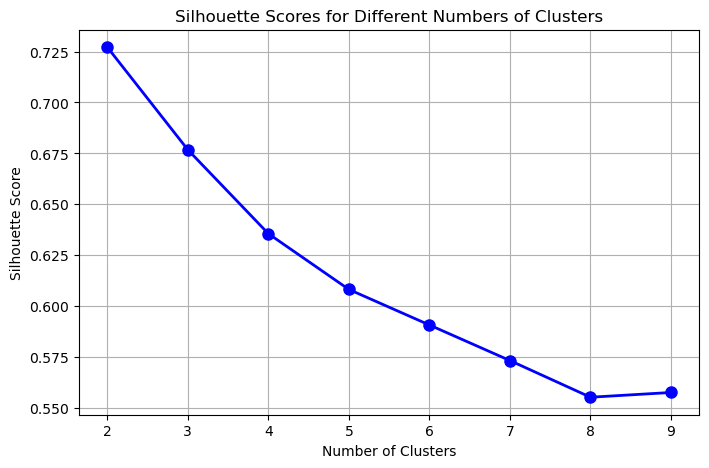

In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Features for clustering
X = max_min_sales_df[['Max_Weekly_Sales', 'Min_Weekly_Sales', 'Sales_Diff']]

sil_scores = []
cluster_range = range(2, 10)  # usually silhouette is undefined for 1 cluster

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)
    print(f"Clusters: {k}, Silhouette Score: {score:.3f}")

# Plot silhouette scores
plt.figure(figsize=(8,5))
plt.plot(cluster_range, sil_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid(True)
plt.show()


In [68]:
import plotly.express as px

# Make sure your DataFrame has the 'Sales_Diff' and 'Cluster' columns
fig = px.scatter_3d(
    max_min_sales_df,
    x='Max_Weekly_Sales',
    y='Min_Weekly_Sales',
    z='Sales_Diff',
    color='Cluster',  # colors points by cluster
    size_max=10,      # size of points
    opacity=0.8
)

fig.update_layout(
    title='3D Scatter Plot of Max, Min, and Difference Sales',
    scene=dict(
        xaxis_title='Max_Weekly_Sales',
        yaxis_title='Min_Weekly_Sales',
        zaxis_title='Sales_Diff'
    )
)

fig.show()


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


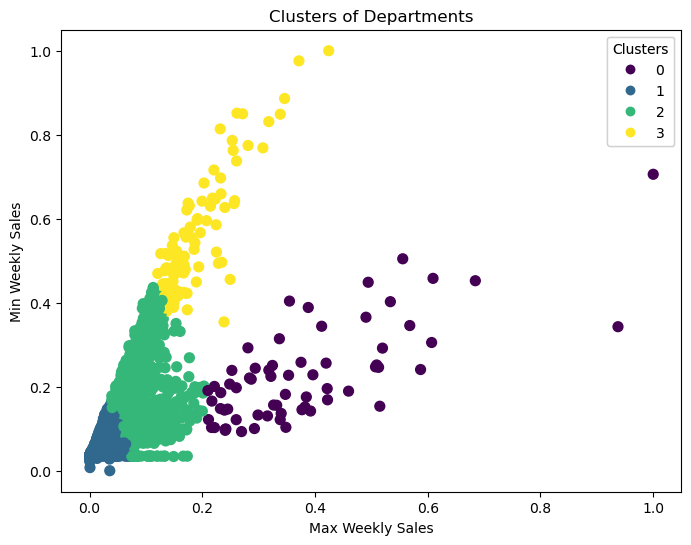

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

scatter = plt.scatter(
    max_min_sales_df['Max_Weekly_Sales'],
    max_min_sales_df['Min_Weekly_Sales'],
    c=max_min_sales_df['Cluster'],
    cmap='viridis',
    s=50
)

# Add legend for clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.xlabel("Max Weekly Sales")
plt.ylabel("Min Weekly Sales")
plt.title("Clusters of Departments")
plt.show()


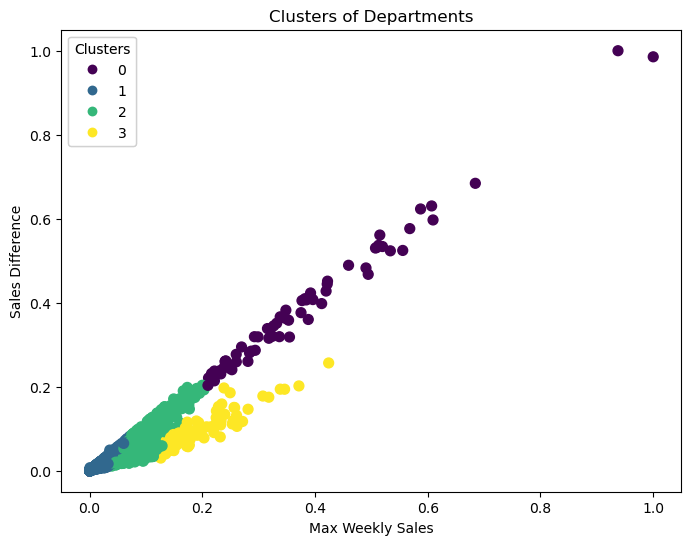

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

scatter = plt.scatter(
    max_min_sales_df['Max_Weekly_Sales'],
    max_min_sales_df['Sales_Diff'],
    c=max_min_sales_df['Cluster'],
    cmap='viridis',
    s=50
)

# Add legend for clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.xlabel("Max Weekly Sales")
plt.ylabel("Sales Difference")
plt.title("Clusters of Departments")
plt.show()


#### Here Cluster as you can see the cluster 0 is representing the departments with highest difference between min and max weekly sales around the holiday weeks suggesting that the department which fall under category 0 are the department experiencing the season weekly sales spikes. Cluster 3 follows the same distribution like cluster 0 in terms of Sales Difference but the slope of that distribution is not that step. Thus we can say that cluster 3 does experience weekly sales spikes but not that high as compared to cluster 0. Cluster 1 and 2 are densly located near origin suggesting that the departments making sales are pretty low and the difference in spikes that they experience is not that high.

In [74]:
cluster_0_subset_df=max_min_sales_df[max_min_sales_df['Cluster']==0]
cluster_0_subset_df.shape

(65, 6)

In [75]:
cluster_0_subset_df.head()

,Store,Dept,Max_Weekly_Sales,Min_Weekly_Sales,Sales_Diff,Cluster
6,1,7,0.240576,0.098786,0.260109,0
56,1,72,0.293916,0.244051,0.286724,0
81,2,5,0.216982,0.165822,0.217206,0
83,2,7,0.382159,0.151732,0.409629,0
134,2,72,0.411757,0.343964,0.397929,0


In [82]:
cluster_0_depts=list(cluster_0_subset_df['Dept'].unique())
cluster_0_train_df=train_df[train_df['Dept'].isin(cluster_0_depts)]
cluster_0_train_df.shape

(25263, 6)

In [83]:
cluster_0_train_df=cluster_0_train_df.sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

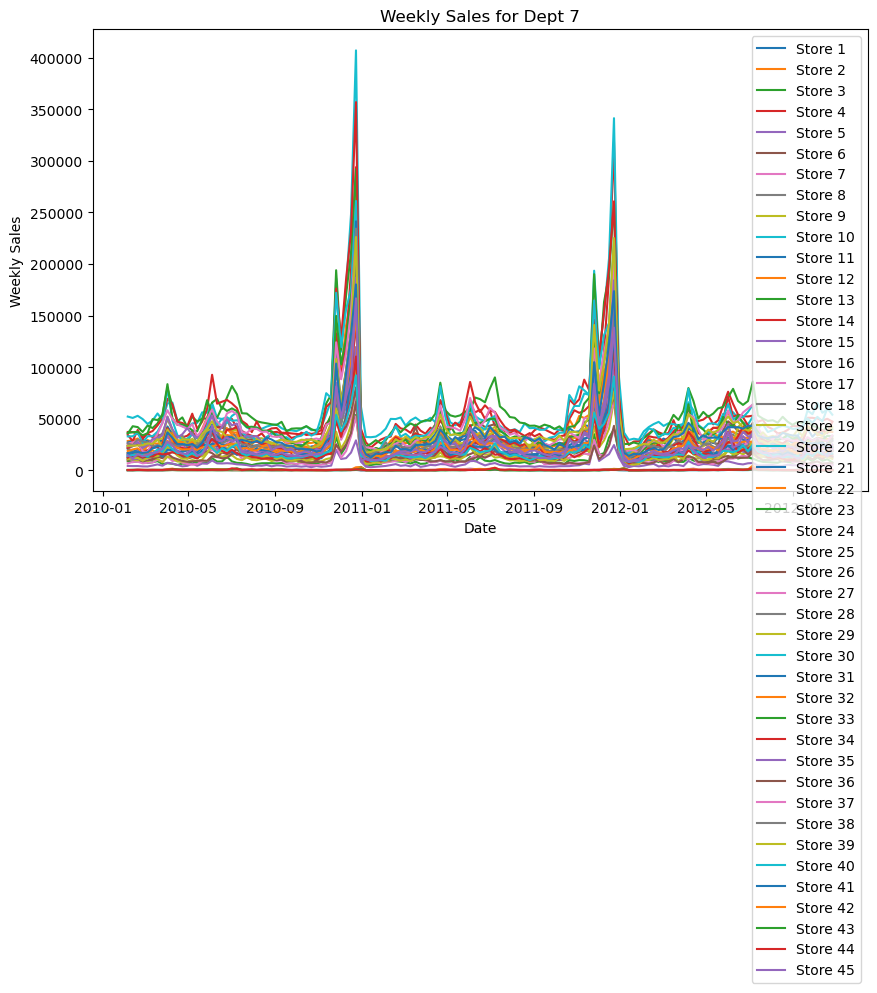

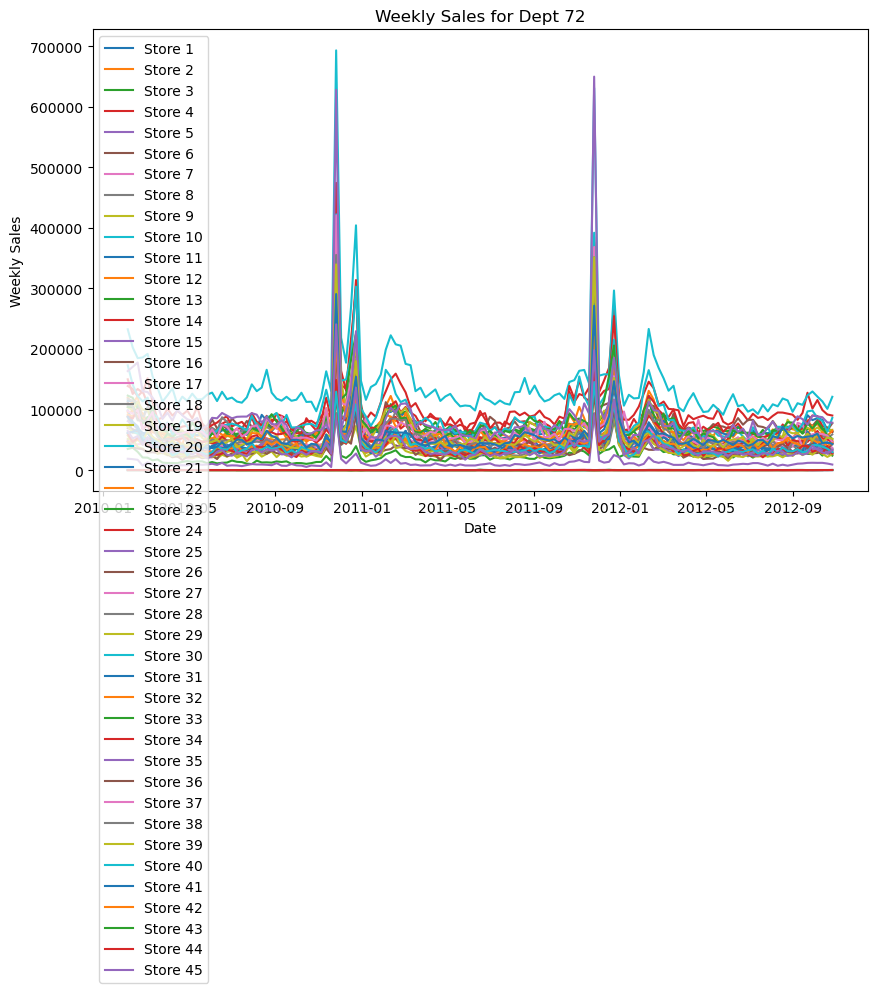

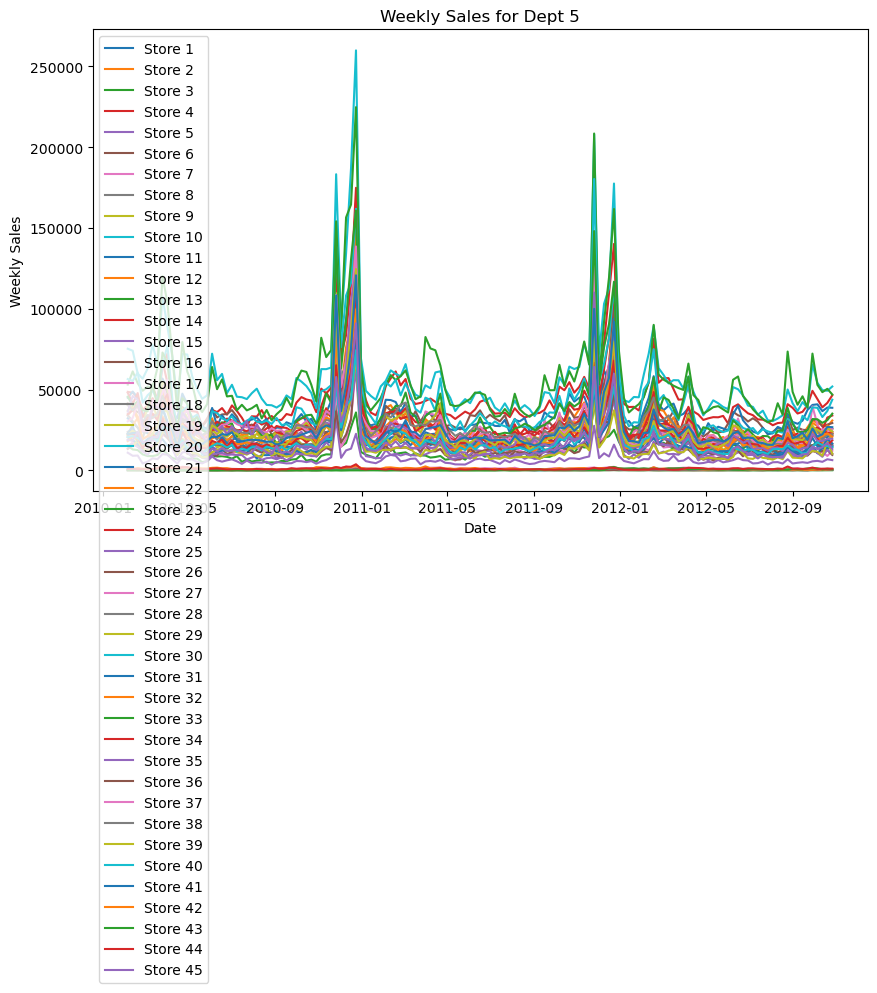

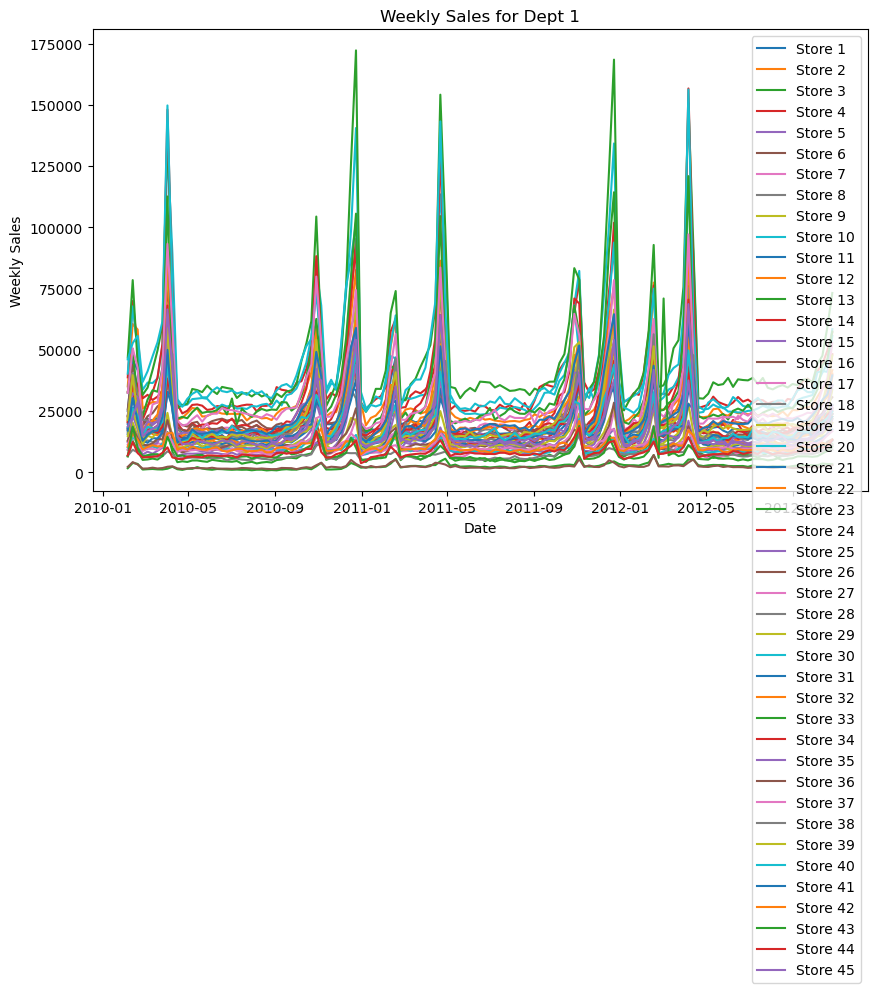

In [85]:
import matplotlib.pyplot as plt

for dept in cluster_0_depts:
    dept_df = cluster_0_train_df[cluster_0_train_df['Dept'] == dept]

    plt.figure(figsize=(10, 6))
    for store, store_df in dept_df.groupby('Store'):
        plt.plot(store_df['Date'], store_df['Weekly_Sales'], label=f'Store {store}')

    plt.title(f'Weekly Sales for Dept {dept}')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.show()


#### As said earlier these departments are experiencing season weekly sales spikes. Moreover these are the departments that are experiencing the highest weekly sales around the holiday weeks so managing the staff as well as inventory for these departments is of utmost priority. For the Staffing, we had imputed certain values for the Unemployment rate and the consumer price index for all of the stores from the feature_stores_merged_df. We can use those imputed values to figure out how much changes we need to do in our current setting of the departments across the stores to reach the values of the unemployment rate and cpi that the store experienced in the earlier years